In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns 
from scipy import stats
from statannot import add_stat_annotation

sns.reset_defaults()

In [42]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [43]:
moving_average([1, 2, 3, 4, 5, 6, 7, 8], 4)

array([2.5, 3.5, 4.5, 5.5, 6.5])

In [44]:
def exp(x, A, tau, c):
    return A*np.exp(-x/tau) + c

In [45]:
data = pd.read_excel('trelax_mut-wt-full.xlsx', sheet_name='wtVSD220N_full')

In [46]:
data.head(3)

,t,bg-mut,bg-wt,D220N-1,D220N-2,wt-1,wt-2,wt-3,wt-4
0,0.000000,0.025,0.26,9.235,5.644,12.463,40.682,9.906,11.164
1,0.064667,0.022,0.27,8.686,5.219,12.171,40.342,9.839,10.449
2,0.129333,0.024,0.29,8.670,5.368,12.014,40.577,10.035,10.974


# tON tOFF detection

In [47]:
flag = 0
on_wt = []
off_wt = []
for i in range(len(data.t)):
    if ((flag == 0) and  (data['bg-wt'][i]>=0.37)):
        flag = 1
        on_wt.append(i)
    if ((flag == 1) and (data['bg-wt'][i]<=0.37)):
        flag = 0
        off_wt.append(i)

In [48]:
flag = 0
on_D = []
off_D = []
for i in range(len(data.t)):
    if ((flag == 0) and  (data['bg-mut'][i]>=0.1)):
        flag = 1
        on_D.append(i)
    if ((flag == 1) and (data['bg-mut'][i]<=0.1)):
        flag = 0
        off_D.append(i)

In [49]:
data_wt = data[['t', 'wt-1', 'wt-2', 'wt-3', 'wt-4']].dropna()
data_D = data[['t', 'D220N-1', 'D220N-2']]
wt_cols = ['wt-1', 'wt-2', 'wt-3', 'wt-4']
D_cols = ['D220N-1', 'D220N-2']

In [50]:
t_D = np.array(data_D['t'])
t_wt = np.array(data_wt['t'])
#
on_D.append(len(t_D)-1)
on_wt.append(len(t_wt)-1)

In [51]:
# finally we have 7 curves, so first tON omitted
print(off_D)
print(on_D)

[41, 203, 366, 530, 694, 859, 1024]
[21, 183, 345, 510, 674, 838, 1003, 1251]


In [52]:
print(off_wt)
print(on_wt)

[39, 202, 366, 531, 695, 862, 1027]
[19, 182, 346, 511, 674, 841, 1007, 1170]


In [53]:
data.t[off_wt[i]:on_wt[i+1]]

IndexError: list index out of range

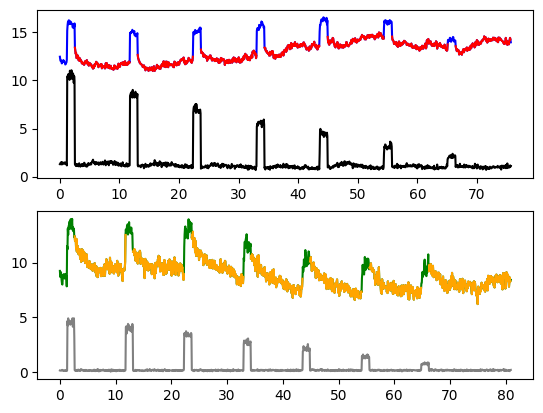

In [54]:
#plt.figure(figsize=(40, 20))
fig, axs = plt.subplots(2,1)
#wt
axs[0].plot(data.t, data['bg-wt']*5, color='black', label='bg-wt')
axs[0].plot(data.t, data['wt-1'], color='blue', label='wt')

for i in range(len(off_wt)):
    axs[0].plot(data.t[off_wt[i]:on_wt[i+1]], data['wt-1'][off_wt[i]:on_wt[i+1]],color='red')#, label='mut-FIT')
           
#mut
axs[1].plot(data.t, data['bg-mut']*5, color='grey', label='bg-mut')
axs[1].plot(data.t, data['D220N-1'], color='green', label='D220N')
for i in range(len(off_D)):
    axs[1].plot(data.t[off_D[i]:on_D[i+1]], data['D220N-1'][off_D[i]:on_D[i+1]],color='orange')#, label='mut-FIT')
    
"""ax.plot(data.t[200:345], data['wt-av'][200:345], color='red', label='wt-to-FIT')
ax.plot(data.t[365:510], data['wt-av'][365:510], color='red', label='wt-to-FIT')
ax.plot(data.t[525:670], data['wt-av'][525:670], color='red', label='wt-to-FIT')
ax.plot(data.t[690:840], data['wt-av'][690:840], color='red', label='wt-to-FIT')
ax.plot(data.t[860:1005], data['wt-av'][860:1005], color='red', label='wt-to-FIT')


ax.plot(data.t[38:180], data['D220N-av'][38:180], color='orange', label='D220N-to-FIT')
ax.plot(data.t[200:345], data['D220N-av'][200:345], color='orange', label='D220N-to-FIT')
ax.plot(data.t[365:510], data['D220N-av'][365:510], color='orange', label='D220N-to-FIT')
ax.plot(data.t[525:670], data['D220N-av'][525:670], color='orange', label='D220N-to-FIT')
ax.plot(data.t[690:835], data['D220N-av'][690:835], color='orange', label='D220N-to-FIT')
ax.plot(data.t[860:1000], data['D220N-av'][860:1000], color='orange', label='D220N-to-FIT')
ax.plot(data.t[1025:1220], data['D220N-av'][1025:1220], color='orange', label='D220N-to-FIT')"""
#sns.catplot(data=data, x= data.iloc[:, 0], y= data.iloc[:, 1], native_scale=1)
#ax.legend()
plt.show()

In [55]:
#fast exp decay - manual tON and tOFF
#not in use now?
#need to write manually and individually fo each repetition?
off1 = [38, 200, 365, 525, 692]
on1 = [140, 246, 428, 559, 735]

off2 = [37, 200, 365, 529, 692, 882]
on2 = [84, 278, 425, 662, 737, 915]

off3 = [38, 201, 365, 530, 694, 861]
on3 = [85, 260, 411, 565, 750, 908]

off4 = [37, 200, 365, 530, 692, 860]
on4 = [135, 246, 405, 555, 747, 946]

on_wt = [on1, on2, on3, on4]
off_wt = [off1, off2, off3, off4] 

In [56]:
on_wt[0]

[140, 246, 428, 559, 735]

In [57]:
on_wt[0][0]

140

In [58]:
off_wt[0][0]

38

In [59]:
off_wt[0]

[38, 200, 365, 525, 692]

In [60]:
data.head(3)

,t,bg-mut,bg-wt,D220N-1,D220N-2,wt-1,wt-2,wt-3,wt-4
0,0.000000,0.025,0.26,9.235,5.644,12.463,40.682,9.906,11.164
1,0.064667,0.022,0.27,8.686,5.219,12.171,40.342,9.839,10.449
2,0.129333,0.024,0.29,8.670,5.368,12.014,40.577,10.035,10.974


In [61]:
data.iloc[:,2]
data.shape[1]-5
len(off_D)

7

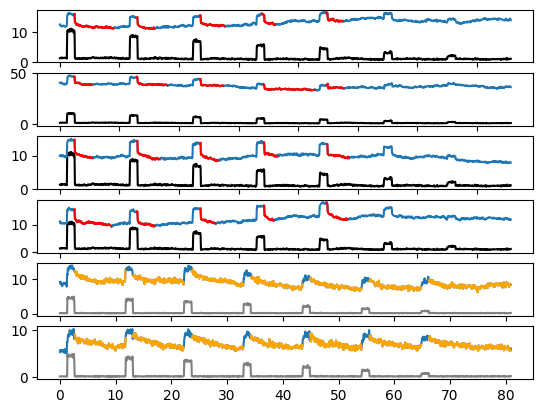

In [62]:
#plt.figure(figsize=(40, 20))
fig, axs = plt.subplots(6,1)
#wt-1 - 4
for i in range(data.shape[1]-5):
    axs[i].plot(data.t, data['bg-wt']*5, color='black', label='bg-wt')
    axs[i].plot(data.t, data.iloc[:,i+5], label='wt')

    for j in range(len(off_wt[0])):
        axs[i].plot(data.t[off_wt[i][j]:on_wt[i][j]], data.iloc[:,i+5][off_wt[i][j]:on_wt[i][j]],color='red')#, label='mut-FIT')

#mut 1-2
for i in range(4, 6):
    axs[i].plot(data.t, data['bg-mut']*5, color='grey', label='bg-mut')
    axs[i].plot(data.t, data.iloc[:,i-1], label='D220N')
    for j in range(len(off_D)):
        axs[i].plot(data.t[off_D[j]:on_D[j+1]], data.iloc[:,i-1][off_D[j]:on_D[j+1]],color='orange')#, label='mut-FIT')

    #sns.catplot(data=data, x= data.iloc[:, 0], y= data.iloc[:, 1], native_scale=1)
    #ax.legend()
plt.show()

# Mut: Curve FIT with Chi2

tau =  1.38
chi2 =  3.02
#######################
tau =  1.56
chi2 =  2.71
#######################
tau =  5.28
chi2 =  2.27
#######################
tau =  4.86
chi2 =  2.37
#######################
tau =  3.76
chi2 =  1.88
#######################
tau =  1.82
chi2 =  2.43
#######################
tau =  1.23
chi2 =  6.07
#######################


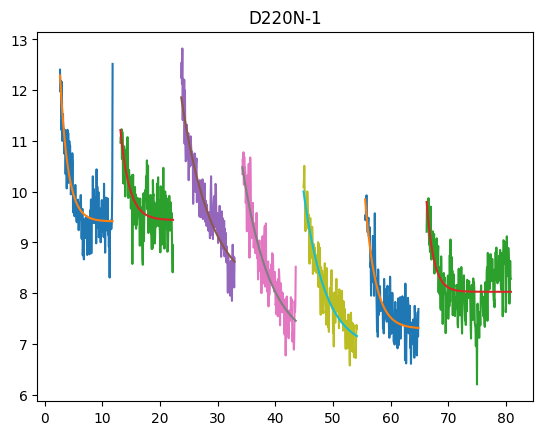

tau =  4.8
chi2 =  2.91
#######################
tau =  4.83
chi2 =  1.98
#######################
tau =  6.78
chi2 =  1.67
#######################
tau =  2.58
chi2 =  1.75
#######################
tau =  2.36
chi2 =  3.44
#######################
tau =  4.24
chi2 =  2.0
#######################
tau =  4.15
chi2 =  3.35
#######################


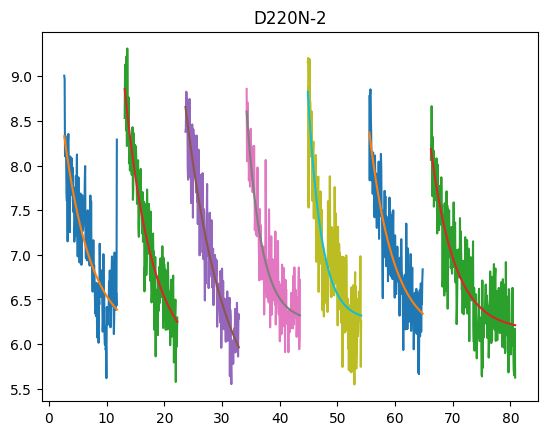

In [63]:
taus_D = []

for col in D_cols:
    t = np.array(data_D['t'])
    D = np.array(data_D[col])
    
    ts = []
    Ds = []
    
    tau_D = []
    
    for i in range(len(off_D)):
        ts.append(t[off_D[i]:on_D[i+1]])
        Ds.append(D[off_D[i]:on_D[i+1]])

    for i in range(len(off_D)):
#         print(i)
#         print(ts[i])
#         print(ts[i][0])
        popt, pcov = curve_fit(exp, ts[i]-ts[i][0], Ds[i], p0 = [2.87754275, 1.37764127, 9.41354768])
        print('tau = ', round(popt[1],2))
        plt.plot(ts[i], Ds[i])
        plt.plot(ts[i], exp(ts[i]-ts[i][0], *popt))
        tau_D.append(popt[1])
        
        chi = stats.chisquare(Ds[i], exp(ts[i]-ts[i][0], *popt))[0]
        print('chi2 = ',  round(chi,2))
        print('#######################')
        
    taus_D.append(tau_D)

    plt.title(col)
    plt.show()   

In [64]:
tau_D

[4.797617660603589,
 4.828669628441554,
 6.778794517410742,
 2.5842463823410617,
 2.357153544892722,
 4.243509897652833,
 4.15118536548486]

In [65]:
taus_D

[[1.3776238881126317,
  1.5621305463164534,
  5.280577854401901,
  4.859030951210982,
  3.7568484153535193,
  1.816204793824631,
  1.2321987437798438],
 [4.797617660603589,
  4.828669628441554,
  6.778794517410742,
  2.5842463823410617,
  2.357153544892722,
  4.243509897652833,
  4.15118536548486]]

# WT: Curve FIT with Chi2

In [66]:
print(off_wt[0])

[38, 200, 365, 525, 692]


[ 1.58552136  0.98042711 11.47526878]
chi2 =  0.21891385002975045
[ 2.11135933  0.32609625 11.22779161]
chi2 =  0.047190696766976514
[ 1.0489351   0.80609849 12.08674995]
chi2 =  0.08218059165209762
[ 3.68794688  0.31681957 12.61710559]
chi2 =  0.12833761721758447
[ 2.04822649  0.15159895 13.72536874]
chi2 =  0.16666209435224277


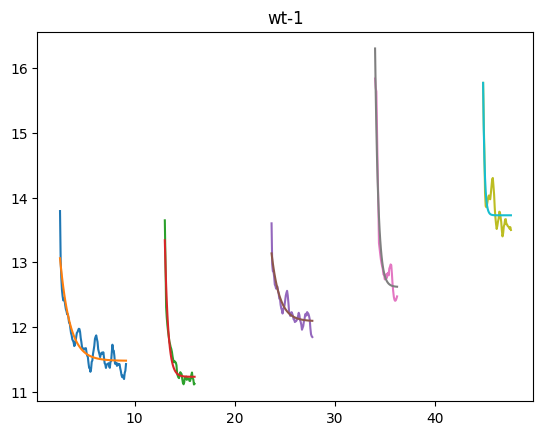

[ 3.85264395  0.53596928 38.89398121]
chi2 =  0.15282897918862
[ 4.36701998  0.1894903  38.92439092]
chi2 =  0.1812724392665624
[ 2.20994205  0.09878734 38.06154538]
chi2 =  0.1145183762345146
[ 2.82928683  0.1118305  34.22063068]
chi2 =  0.41588816074365637
[ 3.50665088  0.11520924 35.78873852]
chi2 =  0.14685239360438457
[ 2.11275819  0.59560519 35.82890031]
chi2 =  0.03639114342152113


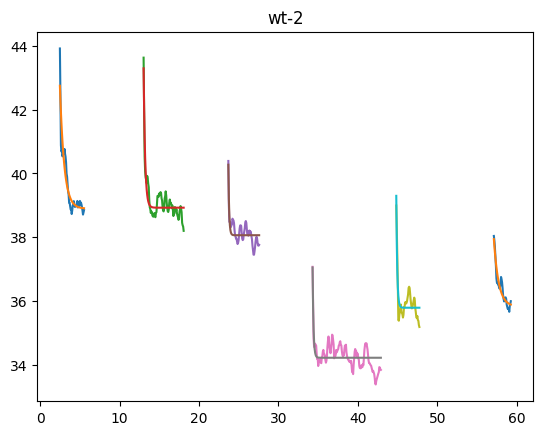

[1.84901824 1.02278794 9.30788941]
chi2 =  0.08588460352070895
[2.32903465 1.54316578 8.75520238]
chi2 =  0.13175147295936082
[2.0741856  1.33872824 8.37964735]
chi2 =  0.13638187951322758
[1.51672263 1.92177641 9.36164746]
chi2 =  0.05872164355373387
[ 2452.08481618  7861.76354588 -2441.67817841]
chi2 =  0.12239741660180357
[1.34155605 0.88902527 9.28868983]
chi2 =  0.07411558927873561


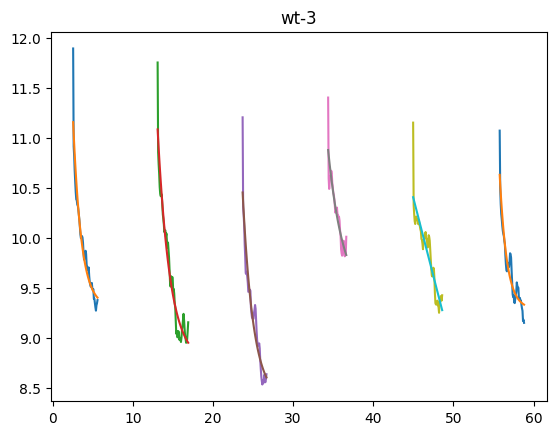

[2.0289106  2.48494658 9.79770967]
chi2 =  1.1052177534071148
[2.81182862 0.21961887 9.94291382]
chi2 =  0.30432083586707304
[2.30663315 1.89760555 9.85430792]
chi2 =  0.11033603397260171
[ 2.33349766  0.43840289 11.50987093]
chi2 =  0.037088227541978935
[ 4.01446889  0.750865   11.88984474]
chi2 =  0.302841793252338
[ 1.4555627   0.91604949 12.55296621]
chi2 =  0.36223230712450805


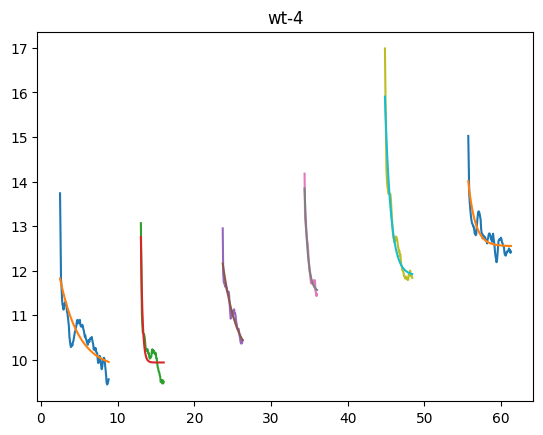

In [67]:
taus_wt = []

for num, col in enumerate(wt_cols):
    t = np.array(data_wt['t'])
    wt = np.array(data_wt[col])
    
    t_ma = moving_average(t, 4)
    wt_ma = moving_average(wt, 4)
    
    ts = []
    ts_ma=[]
    wts = []
    wts_ma = []
    
    tau_wt = []
    
    for i in range(len(off_wt[num])):
        ts.append(t[off_wt[num][i]:on_wt[num][i]+1])
        ts_ma.append(t_ma[off_wt[num][i]:on_wt[num][i]+1])
        wts.append(wt[off_wt[num][i]:on_wt[num][i]+1])
        wts_ma.append(wt_ma[off_wt[num][i]:on_wt[num][i]+1])

    for i in range(len(off_wt[num])):
        popt, pcov = curve_fit(exp, ts_ma[i]-ts_ma[i][0], wts_ma[i], p0 = [3,  1, 10])
        print(popt)
        plt.plot(ts_ma[i], wts_ma[i])
        plt.plot(ts_ma[i], exp(ts_ma[i]-ts_ma[i][0], *popt))
        tau_wt.append(popt[1])
        
        chi = stats.chisquare(wts_ma[i], exp(ts_ma[i]-ts_ma[i][0], *popt))[0]
        print('chi2 = ',  chi)
       
        
    taus_wt.append(tau_wt)

    plt.title(col)
    plt.show()

In [68]:
# remove tau more than 10min
taus_wt
for i in taus_wt:
    for j in i:
        if j>=10:
            i.remove(j)

In [69]:
all_taus_wt = sum(taus_wt, [])
all_taus_D = sum(taus_D, [])

mean_taus_wt = list(map(np.mean, taus_wt))
mean_taus_D = list(map(np.mean, taus_D))

mean_taus_wt
len(all_taus_wt)

22

In [70]:
def p_value(p):
    if ((0.05 < p) & (p <= 1)):
        return 'ns'
    elif ((0.01 < p) & (p <= 0.05)):
        return '*'
    elif ((0.001 < p) & (p <= 0.01)):
        return '**'
    elif ((0.0001 < p) & (p <= 0.001)):
        return '***'
    elif (p <= 0.0001):
        return '****'
p_value_vec = np.vectorize(p_value)

In [71]:
res = stats.ttest_ind(a=all_taus_wt, b=all_taus_D)
p = p_value(res[1])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

wt v.s. D220N: Custom statistical test, P_val:9.524e-08


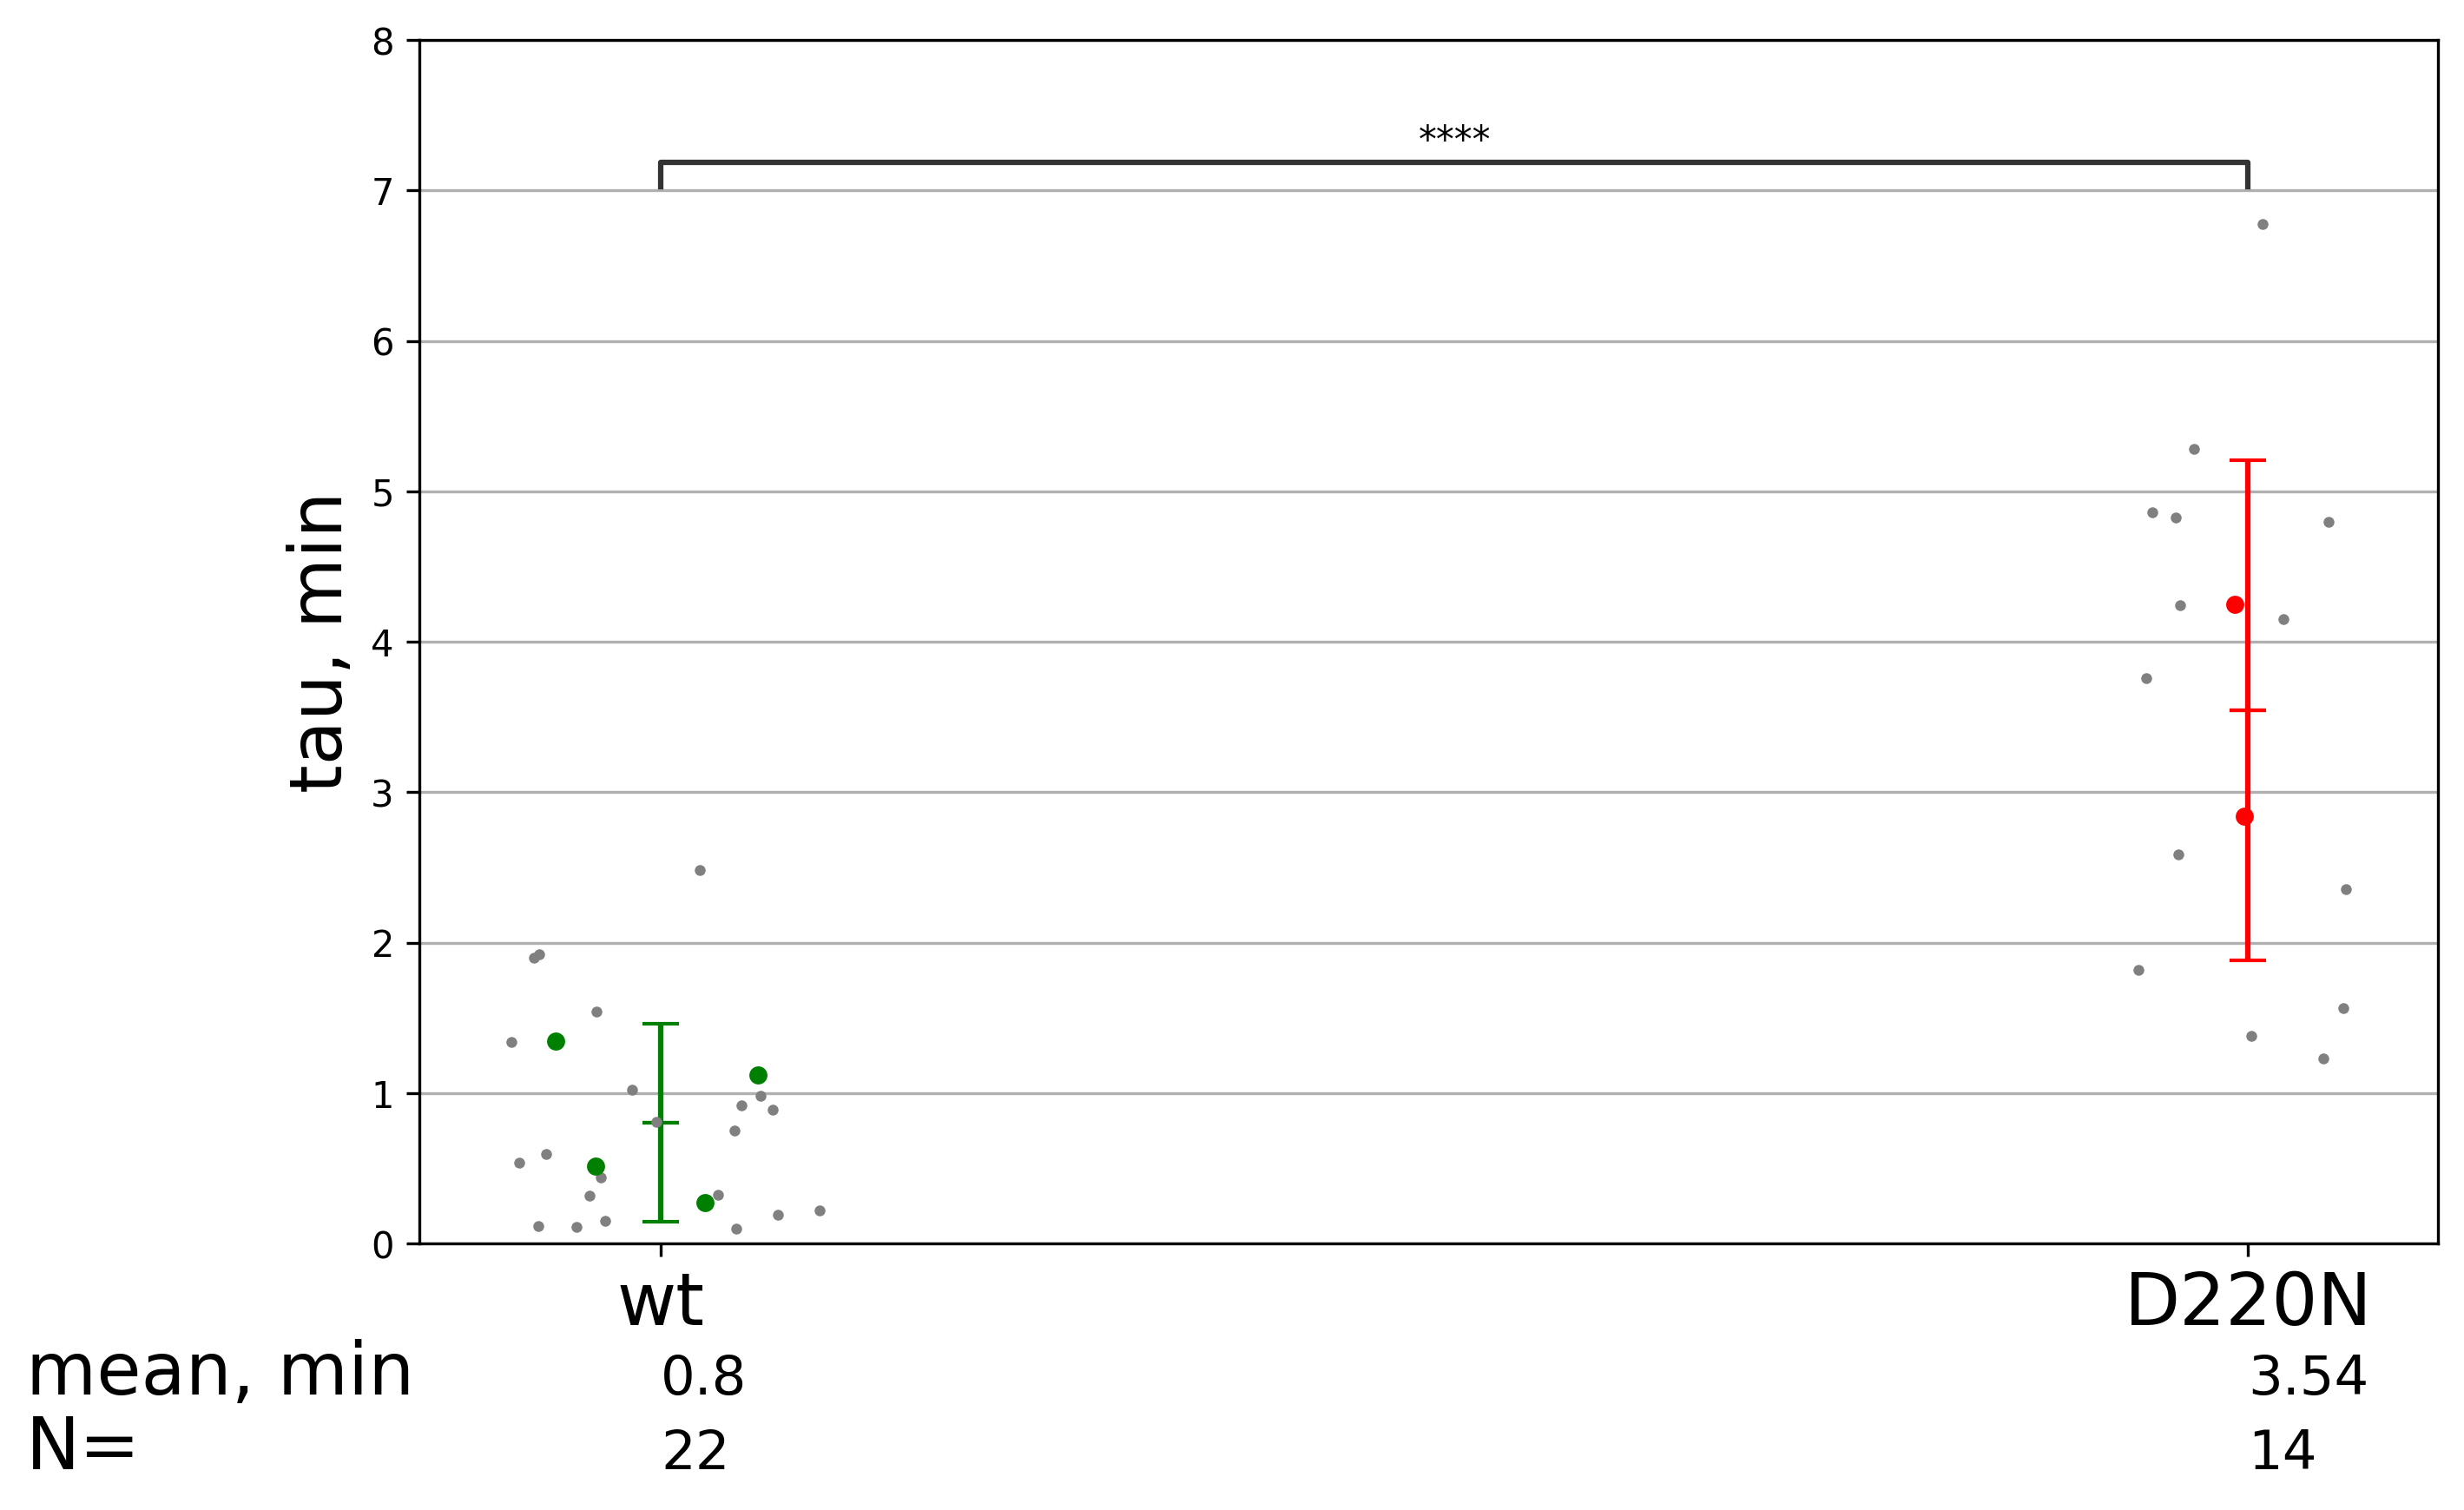

In [72]:
y = np.array([np.mean(all_taus_wt), np.mean(all_taus_D)])
x = ['wt', 'D220N']
yerr = [np.std(all_taus_wt), np.std(all_taus_D)]

c = ['gray']
colors = ['green', 'red']
sns.set_palette(c)

fig = plt.figure(figsize = (10, 6), dpi = 300)
ax0 = plt.subplot(1, 1, 1)

for i in range(2):
    ax0.errorbar([x[i]], [y[i]], yerr=[yerr[i]], capsize=5,  fmt = ' ', color = colors[i])
    ax0.errorbar([x[i]], [y[i]], yerr=[0], capsize=5,  fmt = ' ', color = colors[i])

# ax0.errorbar(x, y, yerr=yerr, capsize=5,  fmt = ' ', color = 'red')
# ax0.errorbar(x, y, yerr=np.zeros(2), capsize=5,  fmt = ' ', color = 'red')
# ax0.errorbar()

sns.stripplot(x=['wt']*len(all_taus_wt), y=all_taus_wt, size = 3)
sns.stripplot(x=['D220N']*len(all_taus_D), y=all_taus_D, size = 3)

sns.stripplot(x=['wt']*len(mean_taus_wt), y=mean_taus_wt, color='green')
sns.stripplot(x=['D220N']*len(mean_taus_D), y=mean_taus_D, color = 'red')

plt.ylabel('tau, min', size = 20)
plt.grid(axis='y')
plt.xticks(rotation = 0, size = 20)
plt.ylim(0, 8)

add_stat_annotation(ax0, x=x, y=y+3, perform_stat_test=False, box_pairs=[['wt', 'D220N']],  pvalues=[res[1]])



#draw number of experiments, mean, 
N=[len(all_taus_wt), len(all_taus_D)]
mean=[np.mean(all_taus_wt), np.mean(all_taus_D)]
plt.text(-0.4, -1.5, 'N=', fontsize=20)
plt.text(-0.4, -1, 'mean, min', fontsize=20) #i+1, count[i], 'lyso-NsXeR'
for i in range(0, 2):
    #plt.text(i-0.275, -75, 'N=', fontsize=45) #i+1, count[i], 'lyso-NsXeR'
    plt.text(i, -1.5, N[i], fontsize=15) #i+1, count[i], 'lyso-NsXeR'
    plt.text(i, -1, round(mean[i], 2), fontsize=15) #i+1, count[i], 'lyso-NsXeR'
    #plt.text(i+0.055, -75, '', fontsize=35) #i+1, count[i], 'lyso-NsXeR'
    #exp format '%.1E' % Decimal(mean[i])

plt.show()

## New plots

In [73]:
data_D

,t,D220N-1,D220N-2
0,0.000000,9.235,5.644
1,0.064667,8.686,5.219
2,0.129333,8.670,5.368
3,0.194000,9.115,5.549
4,0.258683,8.653,5.716
...,...,...,...
1247,80.642350,8.183,5.670
1248,80.707033,8.636,5.647
1249,80.771700,8.303,6.171
1250,80.836367,8.282,5.624


In [74]:
def min_max_norm(arr):
    return (arr - min(arr))/(max(arr)- min(arr))

In [75]:
for i in range(len(off_D)):
    print(on_D[i+1]-off_D[i])

142
142
144
144
144
144
227


In [78]:
for n in range(len(off_wt)):
    for i in range(len(off_wt[n])):
        print(on_wt[n][i]-off_wt[n][i])

102
46
63
34
43
47
78
60
133
45
33
47
59
46
35
56
47
98
46
40
25
55
86


In [79]:
## Очень короткие получатся